# Modelling Heart Disease Presence from Blood Pressure and Cholesterol 

**Names:** Anja Barbour, Mason Lee, Caitlyn Woo, Melody Zheng

## INTRODUCTION

#### Background Information
Heart disease is a condition that negatively affects the heart and overall health of an individual (Mayo Clinic Staff, 2022). Additionally, it is easier to treat when detected early through regular check-ups (Mayo Clinic Staff, 2022). One in twelve Canadian adults over the age of twenty live with heart disease, and it is the second leading cause of death in the country (Government of Canada, 2022). As such, it is important to provide an early diagnosis to ensure the use of more effective treatments for impacted individuals. 

#### Past Research
There are many risk factors associated with a higher likelihood of heart disease, two of the greatest involving blood pressure and cholesterol (CDC, 2023). Much research has been conducted on this topic, with results from populations varying in region, age, ethnicity and sex. Results, including but not limited to studies conducted by Tyroler et al. (1971), the Asia Pacific Cohort Studies Collaboration (2005) and Ueda et al. (2018), evidence that elevated blood pressure and cholesterol are correlated with increased risk of developing heart disease. Moreover, reducing blood pressure and cholesterol brings benefits for heart disease mortality (Asia Pacific Cohort Studies Collaboration, 2005). 

#### Project Goal and Research Question
While current heart disease knowledge is plentiful, it emphasizes the importance of being able to anticipate the likelihood of heart disease. Hence, it would be beneficial to create a model that can predict the diagnosis of heart disease with the two variables of blood pressure and cholesterol. This project will address the question: “Can resting blood pressure and cholesterol be used to predict a diagnosis of heart disease, and is this model valid for predicting a diagnosis of heart disease?”. Based on previous literature, it is hypothesized that blood pressure and cholesterol can be used to predict heart disease, and that the created model will be valid.

#### Data Set Description
In order to answer this research question, the Heart Failure Prediction Data Set found on Kaggle, originally from UC Irvine Machine Learning Repository will be used. It contains 12 columns and 918 observations. Relevant columns to be used include the RestingBP (numerical data describing resting blood pressure in mmHg), Cholesterol (numerical data describing serum cholesterol in mm/dl) and HeartDisease (categorical data describing heart disease present as 1 or heart disease absent as 0) columns. The RestingBP and Cholesterol columns will be used to predict the HeartDisease column.

## METHODS AND RESULTS

#### Reading In Data
The necessary libraries must be loaded in, and the dataset read from the original source into R.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
heart_data <- read_csv("heart_data-Copy1.csv")

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Data Wrangling and Cleaning
A seed is set for reproducibility of random results in assigning data. The data is cleaned and wrangled to include only the necessary columns. The Cholesterol column is filtered to remove 0s (representing NA as it is biologically impossible to have 0 cholesterol). The tibble displaying rows_removed (Table 1) shows the number of rows removed resulting from NAs (172). The cleaned data set is displayed in Table 2 below. The dataset is then split into training and testing data.

In [3]:
set.seed(3)

rows_removed <- heart_data |>
                select(Cholesterol) |>
                filter(Cholesterol == 0) |>
                summarize(number_rows_removed = n())
print("Table 1. Number of Rows Removed Resulting from NAs")
rows_removed

cleaned_heart_data <- heart_data |>
                select(RestingBP, Cholesterol, HeartDisease) |>
                filter(Cholesterol != 0) |>
                mutate(HeartDisease = as_factor(HeartDisease)) |>
                mutate(HeartDisease = fct_recode(HeartDisease, "Normal (No Heart Disease)" = "0", "Heart Disease" = "1"))
print("Table 2. Predictors (Blood Pressure, Cholesterol) and Class of Interest (Heart Disease)")
head(cleaned_heart_data)

heart_split <- initial_split(cleaned_heart_data, prop = 0.75, strata = HeartDisease)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 

[1] "Table 1. Number of Rows Removed Resulting from NAs"


number_rows_removed
<int>
172


[1] "Table 2. Predictors (Blood Pressure, Cholesterol) and Class of Interest (Heart Disease)"


RestingBP,Cholesterol,HeartDisease
<dbl>,<dbl>,<fct>
140,289,Normal (No Heart Disease)
160,180,Heart Disease
130,283,Normal (No Heart Disease)
138,214,Heart Disease
150,195,Normal (No Heart Disease)
120,339,Normal (No Heart Disease)


#### Preliminary Exploratory Training Data Analysis and Visualizing
Summary information is drawn from the training data and shown in the table below (Table 3). A scatter plot (Figure 1) showing the distribution of classes given the two predictors using the training data is drawn as well.

In [4]:
summary_table_heart_training <- heart_data |>
                            group_by(HeartDisease) |>
                            summarize(count = n(),
                                      meanRestingBP = mean(RestingBP),
                                      minRestingBP = min(RestingBP),
                                      maxRestingBP = max(RestingBP),
                                      meanCholesterol = mean(Cholesterol),
                                      minCholesterol = min(Cholesterol),
                                      maxCholesterol = max(Cholesterol))
print("Table 3. Summary Informtion of Training Data")
summary_table_heart_training

[1] "Table 3. Summary Informtion of Training Data"


HeartDisease,count,meanRestingBP,minRestingBP,maxRestingBP,meanCholesterol,minCholesterol,maxCholesterol
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,410,130.1805,80,190,227.1220,0,564
1,508,134.1850,0,200,175.9409,0,603


[1] "Figure 1. Scatter Plot Displaying Training Data Resting Blood Pressure vs. Cholesterol as Predictors for Heart Disease"


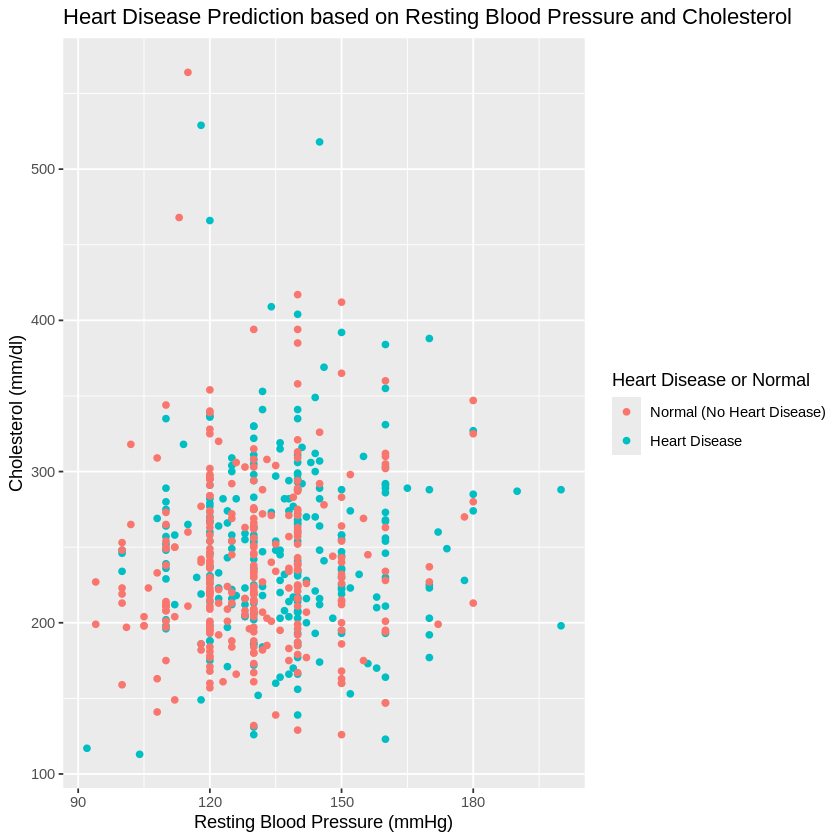

In [14]:
scatterplot_heart_training <- heart_training |>
                            ggplot(aes(x = RestingBP, y = Cholesterol, color = HeartDisease)) +
                            geom_point() +
                            labs(x = "Resting Blood Pressure (mmHg)",
                                 y = "Cholesterol (mm/dl)",
                                 color = "Heart Disease or Normal") +
                            ggtitle("Heart Disease Prediction based on Resting Blood Pressure and Cholesterol")
scatterplot_heart_training
print("Figure 1. Scatter Plot Displaying Training Data Resting Blood Pressure vs. Cholesterol as Predictors for Heart Disease")

#### Selecting a k-value for the K-Nearest Neighbours (k-NN) Classifier
A recipe is created to scale and center the training data. A k-NN model specification is created with the tuning parameter in order to tune the model. A 10-fold cross-validation with k values from 1 to 50  is performed. A 10-fold cross-validation was chosen as it would have a relatively low standard error while not being too heavy in computational power. The values of 1 to 50 were chosen as referring to Figure 1, there does not appear to be a clear pattern for the data. However, it can be seen that there seem to be slightly more normal (no heart disease) cases at the bottom left and more heart disease cases at the top right, and approximately 100 data points on the graph. Hence, it is logical to look at k-values up to 50 (and starting from 1) as 50 is approximately half of the number of data points in the graph. A workflow is built to fit the model and tune the classifier. A summary table (Table 4) displaying the accuracy of the classifier with each k-value in descending order based on accuracy is shown below. A line plot (Figure 2) displaying the accuracy estimate of the classifier against the number of neighbours (k-value) is shown below. Based on Table 4 and Figure 2, the k-value to be used in the classifier yielding the highest accuracy is 28 (with an accuracy of around 0.5869, or 58.69%).

In [6]:
set.seed(3)

heart_recipe <- recipe(HeartDisease ~ RestingBP + Cholesterol, data = heart_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_vfold <- vfold_cv(heart_training, v = 10, strata = HeartDisease)
k_vals <- tibble(neighbors = seq(from = 1, to = 50))

workflow <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = k_vals) |>
            collect_metrics() |>
            filter(.metric == "accuracy")

In [7]:
k_table <- workflow |>
           arrange(desc(mean))
print("Table 4. Classifier Accuracy in Descending Order Across 10 Folds with K-values 1 to 50")
head(k_table)

[1] "Table 4. Classifier Accuracy in Descending Order Across 10 Folds with K-values 1 to 50"


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
28,accuracy,binary,0.5868956,10,0.01601582,Preprocessor1_Model28
27,accuracy,binary,0.5850775,10,0.01524727,Preprocessor1_Model27
40,accuracy,binary,0.5796206,10,0.01132824,Preprocessor1_Model40
25,accuracy,binary,0.5795905,10,0.01286025,Preprocessor1_Model25
39,accuracy,binary,0.5778349,10,0.01160899,Preprocessor1_Model39
30,accuracy,binary,0.5760805,10,0.01197743,Preprocessor1_Model30


[1] "Figure 2. Line Plot Displaying the Accuracy Estimate vs. k-value of K = 1 to K = 50"


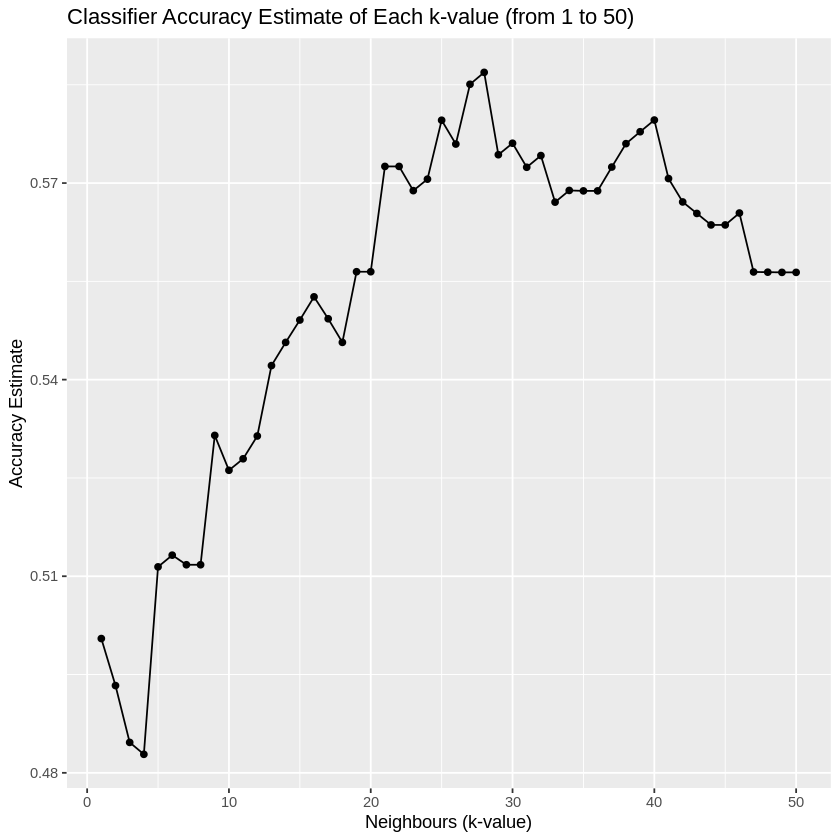

In [8]:
k_graph <- workflow |>
           ggplot(aes(x = neighbors, y = mean)) +
           geom_point() +
           geom_line() +
           labs(x = "Neighbours (k-value)",
                y = "Accuracy Estimate") +
           ggtitle("Classifier Accuracy Estimate of Each k-value (from 1 to 50)")
k_graph
print("Figure 2. Line Plot Displaying the Accuracy Estimate vs. k-value of K = 1 to K = 50")

#### Creating the Classifier with K = 28
A k-NN model specification is created with a specific k-value (28). A workflow is built incorporating the recipe and the new model, fit to the training data. 

In [11]:
classifier_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 28) |>
                   set_engine("kknn") |>
                   set_mode("classification")

classifier_workflow <- workflow() |>
                    add_recipe(heart_recipe) |>
                    add_model(classifier_spec) |>
                    fit(data = heart_training)

#### Testing the Classifier
The k-NN Classifier is evaluated using the testing data set. Predictions of the testing data set are made and combined with the actual testing data set to estimate the accuracy of the k-NN Classifier. The estimated accuracy, precision and recall are displayed in Table 5, Table 6 and Table 7 respectively below. The confusion matrix showing the performance of the k-NN Classifier is shown below (Table 8).

In [12]:
heart_testing_predictions <- predict(classifier_workflow, heart_testing) |>
                            bind_cols(heart_testing)

classifier_accuracy <- heart_testing_predictions |>
                    metrics(truth = HeartDisease, estimate = .pred_class) |>
                    filter(.metric == "accuracy")
print("Table 5. Estimated Accuracy of the k-NN Classifier Based on Testing Data")
classifier_accuracy

classifier_precision <- heart_testing_predictions |>
                     precision(truth = HeartDisease, estimate = .pred_class, event_level = "first")
print("Table 6. Estimated Precision of the k-NN Classifier Based on Testing Data (Positive = Heart Disease Present")
classifier_precision

classifier_recall <- heart_testing_predictions |>
                    recall(truth = HeartDisease, estimate = .pred_class, event_level = "first")
print("Table 7. Estimated Recall of the k-NN Classifier Based on Testing Data (Positive = Heart Disease Present)")
classifier_recall

classifier_confusion_matrix <- heart_testing_predictions |>
                             conf_mat(truth = HeartDisease, estimate = .pred_class)
print("Table 8. Confusion Matrix of the k-NN Classifier Based on Testing Data (Truth = Actual Presence of Heart Disease in Testing Data, Prediction = Prediction of Presence of Heart Disease in Testing Data)")
classifier_confusion_matrix

[1] "Table 5. Estimated Accuracy of the k-NN Classifier Based on Testing Data"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5668449


[1] "Table 6. Estimated Precision of the k-NN Classifier Based on Testing Data (Positive = Heart Disease Present"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.5841584


[1] "Table 7. Estimated Recall of the k-NN Classifier Based on Testing Data (Positive = Heart Disease Present)"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6020408


[1] "Table 8. Confusion Matrix of the k-NN Classifier Based on Testing Data (Truth = Actual Presence of Heart Disease in Testing Data, Prediction = Prediction of Presence of Heart Disease in Testing Data)"


                           Truth
Prediction                  Normal (No Heart Disease) Heart Disease
  Normal (No Heart Disease)                        59            42
  Heart Disease                                    39            47

## DISCUSSION

#### Results Summary
This project investigated the predictive research question: “Can resting blood pressure and cholesterol be used to predict a diagnosis of heart disease, and is this model valid for predicting a diagnosis of heart disease?”. A k-Nearest Neighbours Classifier was created to answer this research question. Results show an accuracy of around 56.68% (refer to Table 5) for the classifier, meaning that out of the total predictions made, around 56.68% were correct. The precision of the classifier is around 58.42% (refer to Table 6), meaning that out of all predictions made for heart disease being present, around 58.42% of those were actual heart disease present cases. Lastly, the recall of the classifier is around 60.2% (refer to Table 7), meaning that out of all positive (heart disease present) cases, around 60.2% were detected (correctly predicted as heart disease present). As displayed in Table 8, out of the heart disease present cases, 47 were correctly predicted and 42 incorrectly predicted. Out of the normal (heart disease not present) cases, 59 were correctly predicted and 39 were incorrectly predicted.

#### Whether Findings were Expected
It was hypothesized that the model using resting blood pressure and cholesterol as predictors would be valid as the predictors can correctly predict the presence of heart disease. In addition to the hypothesis, it is expected that in general, there would be more heart disease present cases at higher resting blood pressure and higher cholesterol levels. This is supported by research conducted by Tyroler et al. (1971) and Ueda et al. (2018) that found high blood pressure and high cholesterol being risk factors for developing heart disease.

The findings partially support the hypothesis, in that resting blood pressure and cholesterol can predict heart disease. The model is mostly valid as the accuracy, precision and recall are all above 50%. However, they are either not the best predictors, or the data/methodology used could be improved (to improve the validity of the model as well) because the accuracy, precision and recall are relatively low (as seen in Tables 5 to 6 respectively). Additionally, findings in Figure 1 indicate that there are slightly more normal (no heart disease) cases when the resting blood pressure and cholesterol are low, and slightly more heart disease cases when the resting blood pressure and cholesterol are high. However, findings were less extreme than expected, as there is no clear relationship between resting blood pressure and cholesterol (both classes are relatively intermingled within the plot). 

This disparity between the findings and expected findings could be due to a lack of usable data as well as a lack of predictors. Firstly, as shown in Table 1, 172 rows of data had to be removed due to the presence of NAs in the Cholesterol column. As such, only a portion of the data in the dataset could be used, reducing the data set size, thus reducing the accuracy of results (increasing the standard error). Secondly, only two predictors of resting blood pressure and cholesterol levels were used in this project. Nevertheless, there are many risk factors for heart disease. For example, past research by Lewington (2003) has found that smoking is correlated with an increased likelihood of heart disease. Increasing age has also been found to be a risk factor, as well as sex differences in those with and those without heart disease (Jousilahti et al., 1999). Thus, the use of only resting blood pressure and cholesterol to predict the presence of heart disease may have contributed to the low accuracy, precision and recall.

#### Impact of Findings
Findings from this project support past research in that in general, heart disease can be predicted by blood pressure and cholesterol in that higher blood pressure and cholesterol indicate a greater likelihood of heart disease. This further emphasizes the importance of maintaining a healthy lifestyle, which can help in lowering both blood pressure and cholesterol, as well as consistently checking one's cholesterol levels and blood pressure (CDC, 2023). In addition, the model created could be used in order to predict the presence of heart disease given someone's blood pressure and cholesterol. Due to the severity of such a prediction, in that any false alarms (predicting heart disease when one does not have it) or misses (missing someone who does have heart disease) are costly, this model should not be used on its own as its accuracy is closer to 50% than to 100%. Nonetheless, it can be used in conjunction with other models or other methods of diagnosis by a doctor to better predict whether someone has heart disease (especially when other heart disease symptoms may not be noticeable yet). Lastly, this model can be used to develop further, more accurate models. For example, findings indicate that the lack of predictors could have impacted the low accuracy of this model, suggesting that future models should incorporate more or other predictors when predicting the presence or absence of heart disease.

#### Future Research and Questions
Results from this project could lead to research regarding other risk factors and how they contribute to heart disease predictions. Some future research questions include: 

- What other factors may predict heart disease and how accurate are they as predictors?
- What is the correlation between blood pressure and cholesterol?
- What other diseases can be predicted using blood pressure and cholesterol?

To answer the first question, a similar model can be created as the one in this project. However, a data set with more or other predictors can be used to see how well they predict heart disease. To answer the second question, a scatter plot similar to Figure 1 can be made with all the data (instead of just the training portion), and a line of best drawn, the Pearson Correlation Coefficient determined to see whether blood pressure and cholesterol are strongly correlated. To answer the last question, research can be done to identify other diseases for which high (or low) blood pressure and cholesterol are risk factors. Then, a similar model as the one in this project can be built to determine the accuracy of such a model using blood pressure and cholesterol for predicting other diseases.

#### Conclusion
Ultimately, this project determined that while resting blood pressure and cholesterol can predict heart disease, the model's accuracy is too low to be used (56.68%).

## BIBLIOGRAPHY

Asia Pacific Cohort Studies Collaboration. (2005). Joint Effects of Systolic Blood Pressure and Serum Cholesterol on Cardiovascular Disease in the Asia Pacific Region. *Circulation, 112*(22), 3384–3390. https://doi.org/10.1161/CIRCULATIONAHA.105.537472

CDC. (2023, March 21). *Know Your Risk for Heart Disease*. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm 

CDC. (2023, March 21). *Prevent Heart Disease*. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/prevention.htm

Government of Canada. (2022, July 28). *Heart Disease in Canada*. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

Jousilahti, P., Vartiainen, E., Tuomilehto, J., Puska, P. (1999). Sex, Age, Cardiovascular Risk Factors, and Coronary Heart Disease. *Circulation, 99*(9), 1165–1172. https://doi.org/10.1161/01.CIR.99.9.1165

Lewington, S. (2003). The importance of cholesterol, blood pressure and smoking for coronary heart disease. *European Heart Journal, 24*(19), 1703-1704. https://doi.org/10.1016/j.ehj.2003.08.003

Mayo Clinic Staff. (2022, August 25). *Heart Disease*. MayoClinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

Tyroler, H. A., Heyden, S., Bartel, A., Cassel, J., Cornoni, J. C., Hames, C. G., & Kleinbaum, D. (1971). Blood Pressure and Cholesterol as Coronary Heart Disease Risk Factors. *Arch Intern Med, 128*(6), 907-914. https://doi.org/10.1001/archinte.1971.00310240061007

Ueda, P., Gulayin, P., & Danaei, G. (2018). Long-term moderately elevated LDL-cholesterol and blood pressure and risk of coronary heart disease. *PLoS ONE, 13*(7): e0200017. https://doi.org/10.1371/journal.pone.0200017 